In [1]:
import sys  
sys.path.insert(1, './../../../../ESN-IP/SOURCES/.')

import random

random.seed(10)


In [2]:
from Reservoir import ReservoirConfiguration
from IPReservoir import IPReservoirConfiguration
from IPMask import IPMask
from DATA import MG17

In [3]:
N = 100

In [4]:
initial_config = ReservoirConfiguration(N_units=N, bias=True, input_scaling=0.5, bu_range = (-0.5, 0.5), bh_range=(-0.5, 0.5), Wu_sparsity=0.85, Wh_sparsity=0.25, desired_rho=0.75 )

In [5]:
configs = [
    IPReservoirConfiguration(initial_config, IPMask.gaussian(N), eta=0.0000025, epochs=10, name="Gaussian"),
    #IPReservoirConfiguration(ReservoirConfiguration(N_units=N, bias=False, desired_rho=0.1,), IPMask.bimodal(N), eta=0.0000025, epochs=10,  name="Bimodal"),
    IPReservoirConfiguration(initial_config, IPMask.trimodal(N), eta=0.0000025, epochs=5, name="Overi Trimodal"),
    IPReservoirConfiguration(initial_config, IPMask.trimodal(N), eta=0.00000125, epochs=10, name="Walk Trimodal"),
    IPReservoirConfiguration(initial_config, IPMask.trimodal(N, linear_rate=3/5), eta=0.00000125, epochs=10, name="NonLinear Trimodal"),
    IPReservoirConfiguration(initial_config, IPMask.quadrimodal(N), eta=0.0000025, epochs=5,  name="Quadrimodal"),
    ReservoirConfiguration(N_units=N, desired_rho=0.96, name="Vanilla"),
]

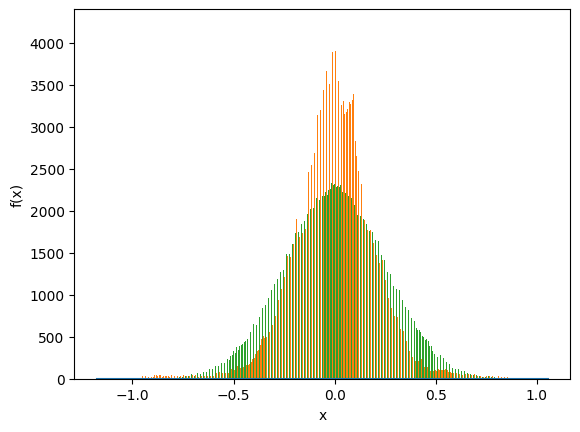

Reservoir warmed up with the first 100 time steps


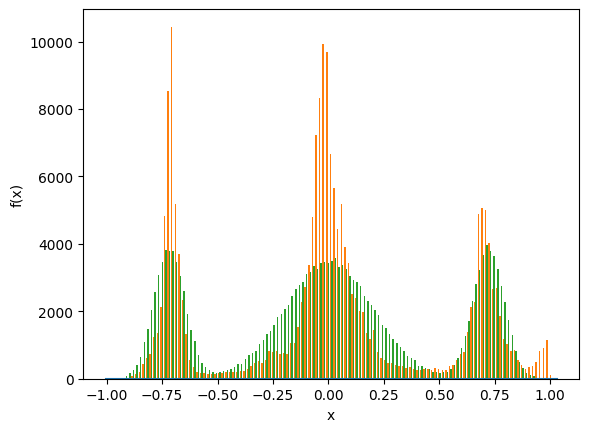

Reservoir warmed up with the first 100 time steps


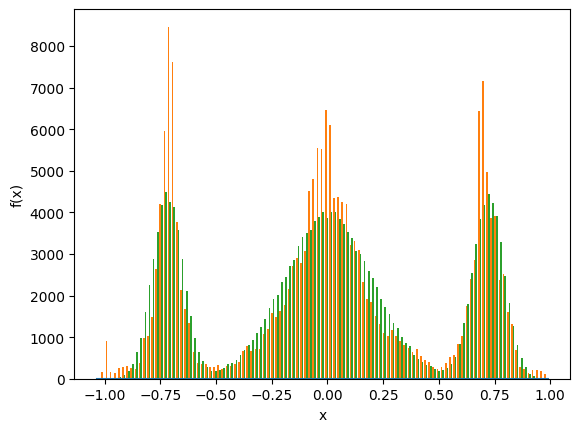

Reservoir warmed up with the first 100 time steps


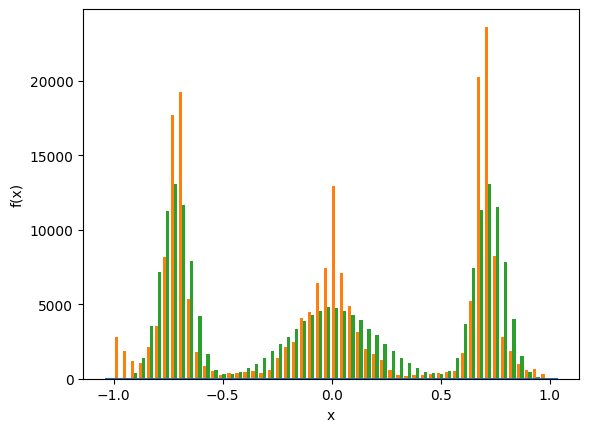

Reservoir warmed up with the first 100 time steps


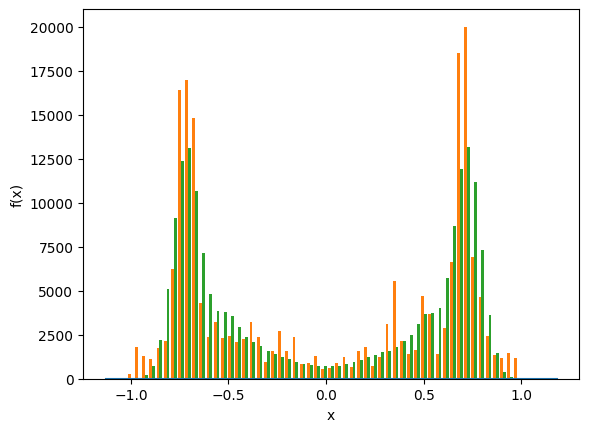

Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps


In [6]:
from Metrics import * 
from Evaluator import Evaluator

results = Evaluator(path=".", experiment_name="Adding biases").evaluate_multiple(configs, data = MG17(percentages=[80, 0, 20]), repetitions=1 )

In [7]:
results

,Model Name,Model Index,Aggregation,MSE,NRMSE,MC,MLLE,DeltaPhi,Neff
0,Gaussian,0.0,Mean,9.544611e-08,0.063779,16.386322,-0.006207,0.139415,4.647186
1,Gaussian,0.0,Std,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
2,Overi Trimodal,1.0,Mean,1.458635e-07,0.078845,9.981802,-0.109487,0.596087,2.185610
3,Overi Trimodal,1.0,Std,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
4,Walk Trimodal,2.0,Mean,1.092852e-07,0.068247,10.210297,-0.210815,0.146273,2.583573
5,Walk Trimodal,2.0,Std,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
6,NonLinear Trimodal,3.0,Mean,1.435789e-07,0.078225,8.584687,-0.118624,0.500730,2.089206
7,NonLinear Trimodal,3.0,Std,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
8,Quadrimodal,4.0,Mean,1.850168e-07,0.088799,8.666579,-0.441127,0.080956,2.084363
9,Quadrimodal,4.0,Std,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
